# IPL 2024 Tournament EDA
# 

Author: Jovan Rodrigues <br>
LinkedIn: https://www.linkedin.com/in/jovan-rodrigue/

**Dataset Description** <br><br>
id: Match number <br>
date: When the match was played <br>
team1: The team that batted first <br>  
team2: The team that batted second <br>
toss_winner: The team that won the toss <br>
decision: The choice made after winning the toss <br>
first_score: The score of the first team <br>
first_wkts: The number of wickets that fell for the first team <br>
second_score: The score of the second team <br>
second_wkts: The number of wickets that fell for the second team <br>
winner: The team that won the match <br>
player_of_match: The best player among the two teams <br>
most_runs: The batsman who scored the most runs <br>
most_wkts: The bowler who took the most wickets (if bowlers have the same number of wickets, economy rate is considered)

In [43]:
import pandas as pd
from collections import defaultdict
import datetime as dt
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/kaggle/input/ipl-2024-matches/ipl2024 Matches.csv'
df = pd.read_csv(file_path)
print(df)

    id           date      team1      team2 toss_winner decision  first_score  \
0    1  March 22,2024   Banglore    Chennai    Banglore      Bat          173   
1    2  March 23,2024      Delhi     Punjab      Punjab    Field          174   
2    3  March 23,2024    Kolkata  Hyderabad   Hyderabad    Field          208   
3    4  March 24,2024  Rajasthan    Lucknow   Rajasthan      Bat          193   
4    5  March 24,2024    Gujarat     Mumbai      Mumbai    Field          168   
..  ..            ...        ...        ...         ...      ...          ...   
69  70    May 19,2024  Rajasthan    Kolkata     Kolkata      NaN            0   
70  71    May 21,2024  Hyderabad    Kolkata   Hyderabad      Bat          159   
71  72    May 22,2024   Banglore  Rajasthan   Rajasthan    Field          172   
72  73    May 24,2024  Hyderabad  Rajasthan   Rajasthan    Field          175   
73  74    May 26,2024  Hyderabad    Kolkata   Hyderabad      Bat          113   

    first_wkts  second_scor

In [3]:
df.head

<bound method NDFrame.head of     id           date      team1      team2 toss_winner decision  first_score  \
0    1  March 22,2024   Banglore    Chennai    Banglore      Bat          173   
1    2  March 23,2024      Delhi     Punjab      Punjab    Field          174   
2    3  March 23,2024    Kolkata  Hyderabad   Hyderabad    Field          208   
3    4  March 24,2024  Rajasthan    Lucknow   Rajasthan      Bat          193   
4    5  March 24,2024    Gujarat     Mumbai      Mumbai    Field          168   
..  ..            ...        ...        ...         ...      ...          ...   
69  70    May 19,2024  Rajasthan    Kolkata     Kolkata      NaN            0   
70  71    May 21,2024  Hyderabad    Kolkata   Hyderabad      Bat          159   
71  72    May 22,2024   Banglore  Rajasthan   Rajasthan    Field          172   
72  73    May 24,2024  Hyderabad  Rajasthan   Rajasthan    Field          175   
73  74    May 26,2024  Hyderabad    Kolkata   Hyderabad      Bat          113  

In [4]:
df.describe()

,id,first_score,first_wkts,second_score,second_wkts
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,180.554054,6.148649,169.054054,5.783784
std,21.505813,51.855474,2.469998,47.651386,2.934305
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.250000,162.250000,4.250000,145.250000,3.250000
50%,37.500000,182.500000,6.000000,173.500000,6.000000
75%,55.750000,208.000000,8.000000,198.250000,8.000000
max,74.000000,277.000000,10.000000,262.000000,10.000000


**Data Transformation**


In [5]:
df['total_runs_match']=df['first_score']+df['second_score'] 
df['total_wickets_match']=df['first_wkts']+df['second_wkts'] 

*Descriptive Analysis*

In [6]:
print("The highest combined score in a match was: ",df['total_runs_match'].max())
print("The lowest combined score in a match was: ",df['total_runs_match'].min())

The highest combined score in a match was:  523
The lowest combined score in a match was:  0


In [7]:
print("The highest combined wickets in a match was: ",df['total_wickets_match'].max())
print("The lowest combined wickets in a match was: ",df['total_wickets_match'].min())

The highest combined wickets in a match was:  20
The lowest combined wickets in a match was:  0


In [8]:
match_results = df['winner'].unique()
print("The different results for the matches were :\n",match_results)

The different results for the matches were :
 ['Chennai' 'Punjab' 'Kolkata' 'Rajasthan' 'Gujarat' 'Banglore' 'Hyderabad'
 'Lucknow' 'Delhi' 'Mumbai' 'Abandoned']


In [9]:
list_player_of_the_match = df['player_of_the_match'].unique()
print("The list of different Man-of-Match winners :\n",list_player_of_the_match)

The list of different Man-of-Match winners :
 ['Mustafizur Rahman' 'Sam Curran' 'Andre Russell' 'Sanju Samson'
 'Sai Sudharsan' 'Virat Kohli' 'Shivam Dube' 'Abhishek Sharma'
 'Riyan Parag' 'Sunil Narine' 'Mayank Yadav' 'Mohit Sharma'
 'Khaleel Ahmed' 'Trent Boult' 'Shashank Singh' 'Jos Buttler'
 'Romario Shepherd' 'Yash Thakur' 'Ravindra Jadeja' 'Nitish Kumar Reddy'
 'Rashid Khan' 'Jasprit Bumrah' 'Kuldeep Yadav' 'Shimron Hetmyer'
 'Phil Salt' 'Matheesha Pathirana' 'Travis Head' 'Rishabh Pant' 'KL Rahul'
 'Sai Kishore' 'Sandeep Sharma' 'Marcus Stoinis' 'Rajat Patidar'
 'Jonny Bairstow' 'Jake Fraser-McGurk' 'Will Jacks' 'Ruturaj Gaikwad'
 'Varun Chakravarthy' 'Harpreet Brar' 'Bhuvneshwar Kumar' 'Venkatesh Iyer'
 'Mohammed Siraj' 'Suryakumar Yadav' 'Shubman Gill' 'Simarjeet Singh'
 'Cameron Green' nan 'Ishant Sharma' 'Nicholas Pooran' 'Faf du Plessis'
 'Mitchell Starc' 'Ravichandran Ashwin' 'Shahbaz Ahmed']


In [10]:
most_wins= df['winner'].value_counts()
print("The teams and the number of wins: ",most_wins)

The teams and the number of wins:  winner
Kolkata      11
Rajasthan     9
Hyderabad     9
Chennai       7
Banglore      7
Lucknow       7
Delhi         7
Punjab        5
Gujarat       5
Mumbai        4
Abandoned     3
Name: count, dtype: int64


In [11]:
toss_wins= df['toss_winner'].value_counts()
print("The team that won tosses : ",toss_wins)

The team that won tosses :  toss_winner
Rajasthan    11
Punjab       10
Mumbai       10
Lucknow       9
Banglore      8
Hyderabad     7
Delhi         7
Kolkata       4
Gujarat       3
Chennai       3
No Toss       2
Name: count, dtype: int64


In [12]:
player_awards=df['player_of_the_match'].value_counts().iloc[:15]
print("The player and number of awards : ",player_awards)

The player and number of awards :  player_of_the_match
Travis Head           3
Abhishek Sharma       3
Sunil Narine          3
Jos Buttler           2
Rishabh Pant          2
Sam Curran            2
Varun Chakravarthy    2
Kuldeep Yadav         2
Jasprit Bumrah        2
Ravindra Jadeja       2
Marcus Stoinis        2
Mitchell Starc        2
Virat Kohli           2
Mayank Yadav          2
Andre Russell         2
Name: count, dtype: int64


In [13]:
firstteam = df['team1']
firstscore = df['first_score']
first_team_score_sums = defaultdict(int)
for team, score in zip(firstteam, firstscore):
    first_team_score_sums[team] += score
first_team_score_sums_dict = dict(first_team_score_sums)

print(first_team_score_sums_dict)

{'Banglore': 1758, 'Delhi': 1428, 'Kolkata': 1884, 'Rajasthan': 859, 'Gujarat': 1034, 'Punjab': 679, 'Chennai': 1504, 'Hyderabad': 1895, 'Lucknow': 1446, 'Mumbai': 874}


In [72]:
df_first_team_score_sum = pd.DataFrame(list(first_team_score_sums_dict.items()), columns=['Team', 'ScoreFirstTeam'])
print(df_first_team_score_sum)

        Team  ScoreFirstTeam
0   Banglore            1758
1      Delhi            1428
2    Kolkata            1884
3  Rajasthan             859
4    Gujarat            1034
5     Punjab             679
6    Chennai            1504
7  Hyderabad            1895
8    Lucknow            1446
9     Mumbai             874


In [14]:
secondteam = df['team2']
secondscore = df['second_score']
second_team_score_sums = defaultdict(int)
for team, score in zip(secondteam, secondscore):
    second_team_score_sums[team] += score
second_team_score_sums_dict = dict(second_team_score_sums)

print(second_team_score_sums_dict)

{'Chennai': 1020, 'Punjab': 1808, 'Hyderabad': 1057, 'Lucknow': 1037, 'Mumbai': 1694, 'Banglore': 1172, 'Gujarat': 1006, 'Delhi': 1145, 'Kolkata': 783, 'Rajasthan': 1788}


In [74]:
df_second_team_score_sum = pd.DataFrame(list(second_team_score_sums_dict.items()), columns=['Team', 'ScoreSecondTeam'])
print(df_second_team_score_sum)

        Team  ScoreSecondTeam
0    Chennai             1020
1     Punjab             1808
2  Hyderabad             1057
3    Lucknow             1037
4     Mumbai             1694
5   Banglore             1172
6    Gujarat             1006
7      Delhi             1145
8    Kolkata              783
9  Rajasthan             1788


In [77]:
Total_score= df_first_team_score_sum.merge(df_second_team_score_sum,on ='Team',how='inner' )
Total_score['TotalScore']=Total_score['ScoreFirstTeam']+Total_score['ScoreSecondTeam']
Total_score_val = sum(Total_score['TotalScore'])
Total_score['Score %'] = Total_score['TotalScore']/Total_score_val*100
print("The total score : \n",Total_score)

The total score : 
         Team  ScoreFirstTeam  ScoreSecondTeam  TotalScore    Score %
0   Banglore            1758             1172        2930  11.325422
1      Delhi            1428             1145        2573   9.945499
2    Kolkata            1884              783        2667  10.308840
3  Rajasthan             859             1788        2647  10.231533
4    Gujarat            1034             1006        2040   7.885277
5     Punjab             679             1808        2487   9.613080
6    Chennai            1504             1020        2524   9.756098
7  Hyderabad            1895             1057        2952  11.410460
8    Lucknow            1446             1037        2483   9.597619
9     Mumbai             874             1694        2568   9.926172


In [15]:
first_team = df['team1']
first_wickets = df['first_wkts']
first_team_wkts_sums = defaultdict(int)
for team, wkts in zip(first_team, first_wickets):
    first_team_wkts_sums[team] += wkts
first_team_wkts_sums_dict = dict(first_team_wkts_sums)
print("The number of wickets that fell for first team : \n",first_team_wkts_sums_dict)

The number of wickets that fell for first team : 
 {'Banglore': 59, 'Delhi': 43, 'Kolkata': 64, 'Rajasthan': 26, 'Gujarat': 36, 'Punjab': 29, 'Chennai': 44, 'Hyderabad': 70, 'Lucknow': 47, 'Mumbai': 37}


In [37]:
df_first_team_wkts_sum = pd.DataFrame(list(first_team_wkts_sums_dict.items()), columns=['Team', 'WicketFallFirstTeam'])
print(df_first_team_wkts_sum)

        Team  WicketFallFirstTeam
0   Banglore                   59
1      Delhi                   43
2    Kolkata                   64
3  Rajasthan                   26
4    Gujarat                   36
5     Punjab                   29
6    Chennai                   44
7  Hyderabad                   70
8    Lucknow                   47
9     Mumbai                   37


In [16]:
second_team = df['team2']
second_wickets = df['second_wkts']
second_team_wkts_sums = defaultdict(int)
for team, score in zip(second_team, second_wickets):
    second_team_wkts_sums[team] += score
second_team_wkts_sums_dict = dict(second_team_wkts_sums)

print("The number of wickets that fell for second team : \n",second_team_wkts_sums_dict)

The number of wickets that fell for second team : 
 {'Chennai': 33, 'Punjab': 63, 'Hyderabad': 35, 'Lucknow': 37, 'Mumbai': 59, 'Banglore': 40, 'Gujarat': 43, 'Delhi': 51, 'Kolkata': 12, 'Rajasthan': 55}


In [40]:
df_second_team_wkts_sum = pd.DataFrame(list(second_team_wkts_sums_dict.items()), columns=['Team', 'WicketFallSecondTeam'])
print(df_second_team_wkts_sum)

        Team  WicketFallSecondTeam
0    Chennai                    33
1     Punjab                    63
2  Hyderabad                    35
3    Lucknow                    37
4     Mumbai                    59
5   Banglore                    40
6    Gujarat                    43
7      Delhi                    51
8    Kolkata                    12
9  Rajasthan                    55


In [62]:
Total_wickets= df_first_team_wkts_sum.merge(df_second_team_wkts_sum,on ='Team',how='inner' )
Total_wickets['TotalWicketsLost']=Total_wickets['WicketFallFirstTeam']+Total_wickets['WicketFallSecondTeam']
Total_wickets_val = sum(Total_wickets['TotalWicketsLost'])
Total_wickets['Wicket %'] = Total_wickets['TotalWicketsLost']/Total_wickets_val*100
print("The total number of wickets : \n",Total_wickets)

The total number of wickets : 
         Team  WicketFallFirstTeam  WicketFallSecondTeam  TotalWicketsLost  \
0   Banglore                   59                    40                99   
1      Delhi                   43                    51                94   
2    Kolkata                   64                    12                76   
3  Rajasthan                   26                    55                81   
4    Gujarat                   36                    43                79   
5     Punjab                   29                    63                92   
6    Chennai                   44                    33                77   
7  Hyderabad                   70                    35               105   
8    Lucknow                   47                    37                84   
9     Mumbai                   37                    59                96   

    Wicket %  
0  11.211778  
1  10.645527  
2   8.607022  
3   9.173273  
4   8.946772  
5  10.419026  
6   8.720272  


In [18]:
toss_counts = pd.DataFrame({
    'Team': df['toss_winner'],
    'Count of Field': df['decision'].apply(lambda x: 1 if x == 'Field' else 0),
    'Count of Bat': df['decision'].apply(lambda x: 1 if x == 'Bat' else 0)
})

# Group by the 'Team' and sum the counts
toss_summary = toss_counts.groupby('Team').sum().reset_index()
toss_summary = toss_summary[toss_summary['Team'] != 'No Toss'] #Remove NO Toss
print(toss_summary)

         Team  Count of Field  Count of Bat
0    Banglore               6             2
1     Chennai               3             0
2       Delhi               5             2
3     Gujarat               3             0
4   Hyderabad               3             4
5     Kolkata               2             1
6     Lucknow               5             4
7      Mumbai               9             1
9      Punjab               8             2
10  Rajasthan               8             3


In [19]:
toss_summary['Total toss wins']= toss_summary['Count of Field']+toss_summary['Count of Bat']
toss_summary['Decision to Field %']= toss_summary['Count of Field']/toss_summary['Total toss wins']*100
toss_summary['Decision to bat %']= toss_summary['Count of Bat']/toss_summary['Total toss wins']*100             
print(toss_summary)

         Team  Count of Field  Count of Bat  Total toss wins  \
0    Banglore               6             2                8   
1     Chennai               3             0                3   
2       Delhi               5             2                7   
3     Gujarat               3             0                3   
4   Hyderabad               3             4                7   
5     Kolkata               2             1                3   
6     Lucknow               5             4                9   
7      Mumbai               9             1               10   
9      Punjab               8             2               10   
10  Rajasthan               8             3               11   

    Decision to Field %  Decision to bat %  
0             75.000000          25.000000  
1            100.000000           0.000000  
2             71.428571          28.571429  
3            100.000000           0.000000  
4             42.857143          57.142857  
5             66.666667  

Toss win percentage by team


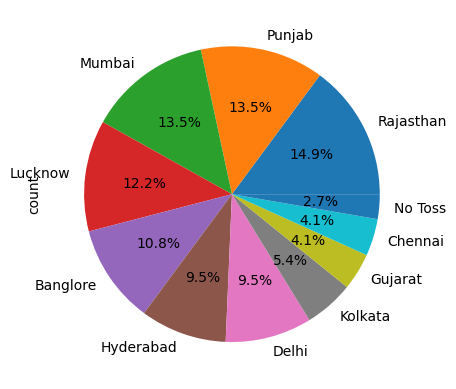

In [21]:
df['toss_winner'].value_counts().plot(kind='pie',autopct='%0.1f%%')
print("Toss win percentage by team")

Win percentage by team


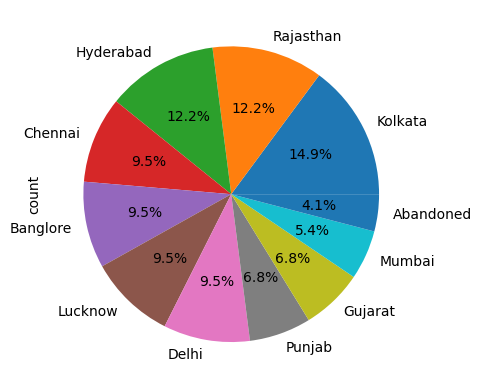

In [22]:
df['winner'].value_counts().plot(kind='pie',autopct='%0.1f%%')
print("Win percentage by team")

What did the toss winning decide the most 


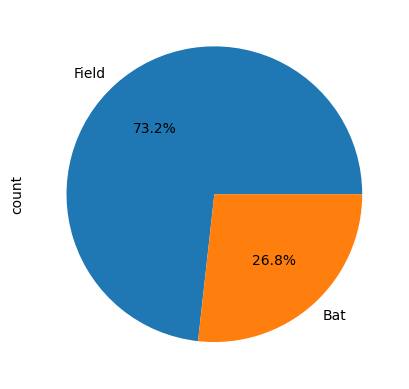

In [23]:
df['decision'].value_counts().plot(kind='pie',autopct='%0.1f%%')
print("What did the toss winning decide the most ")

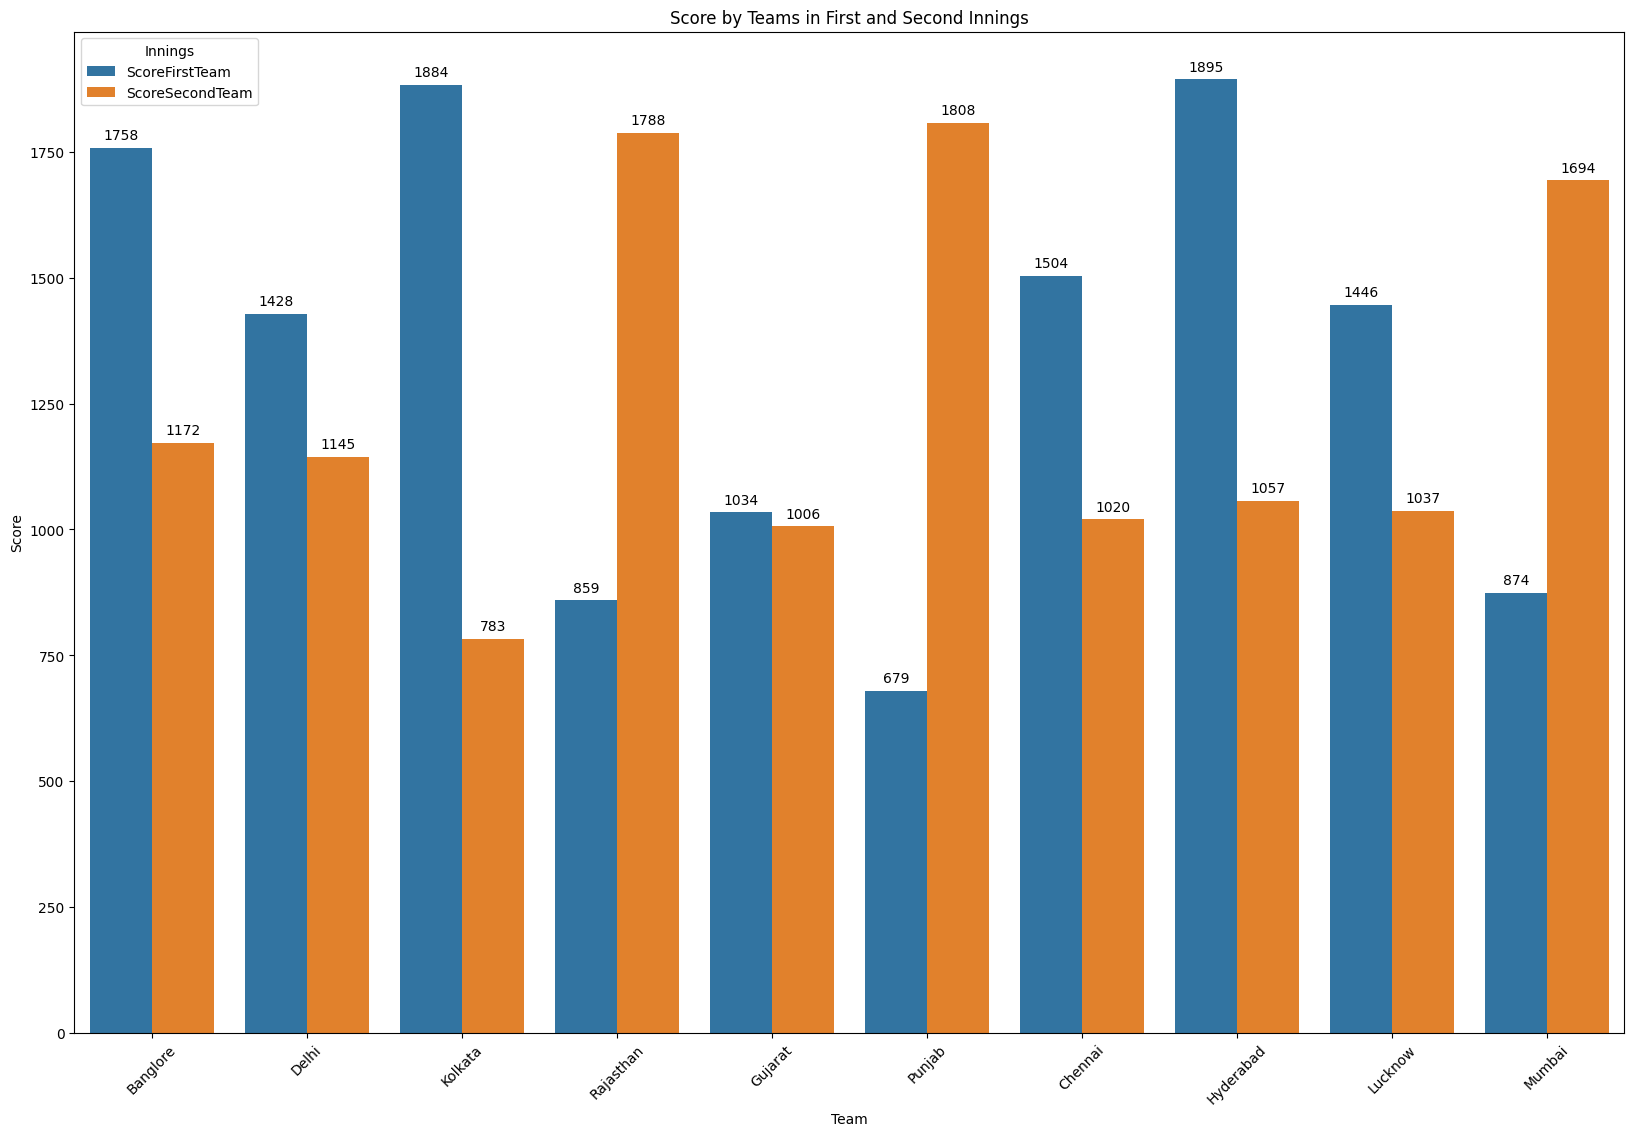

In [83]:
df_scored = Total_score.melt(id_vars='Team', value_vars=['ScoreFirstTeam', 'ScoreSecondTeam'], 
                    var_name='Innings', value_name='Score')

plt.figure(figsize=(20,13))
barplot = sns.barplot(data=df_scored, x='Team', y='Score', hue='Innings')

# Adding the exact values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Score by Teams in First and Second Innings')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Innings', loc='upper left')
plt.show()

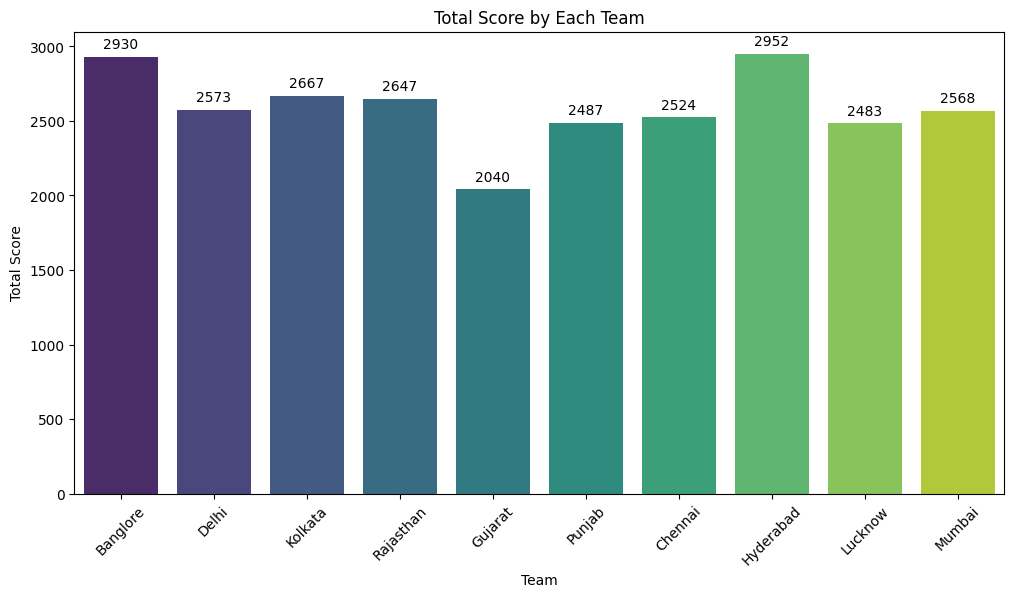

In [86]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=Total_score, x='Team', y='TotalScore', palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.title('Total Score by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()

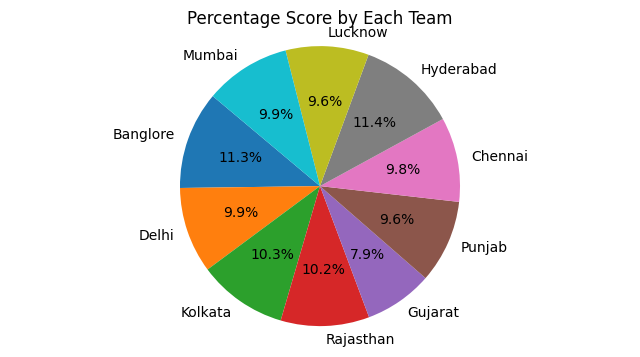

In [87]:
plt.figure(figsize=(8,4))
colors = plt.get_cmap('tab10').colors
plt.pie(Total_score['Score %'], labels=Total_score['Team'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage Score by Each Team')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

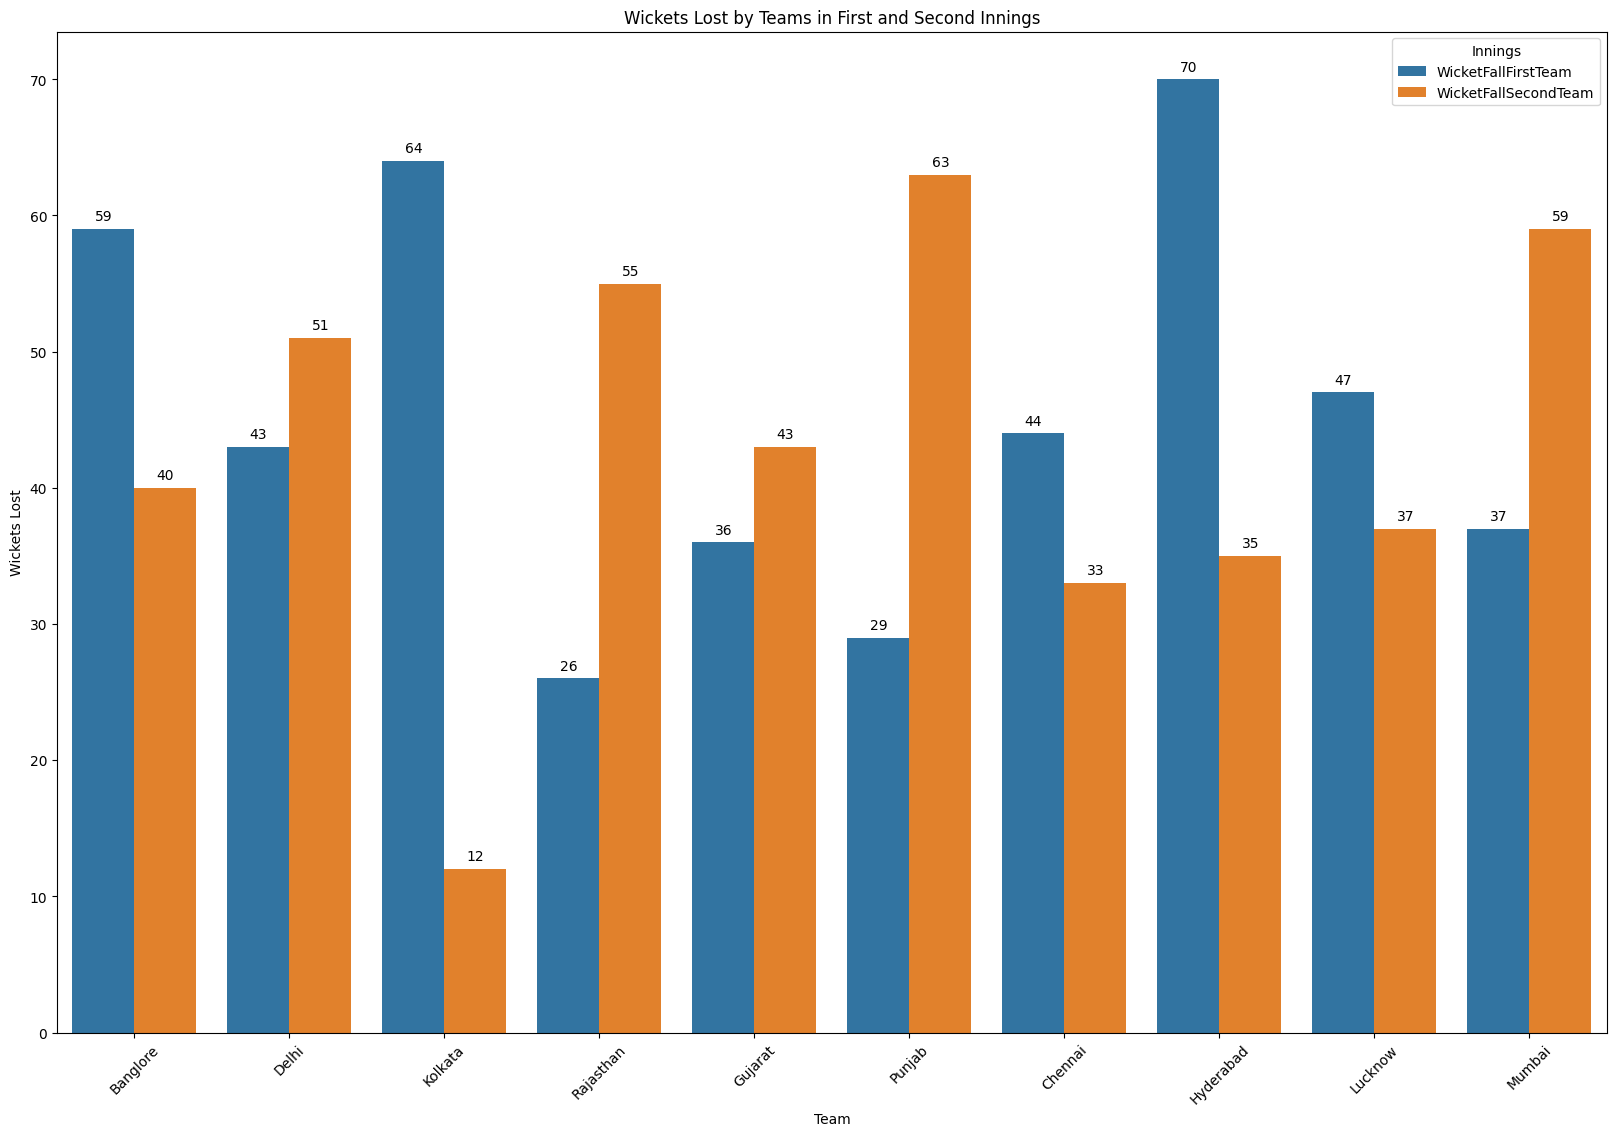

In [47]:
df_melted = Total_wickets.melt(id_vars='Team', value_vars=['WicketFallFirstTeam', 'WicketFallSecondTeam'], 
                    var_name='Innings', value_name='Wickets Lost')

plt.figure(figsize=(20,13))
barplot = sns.barplot(data=df_melted, x='Team', y='Wickets Lost', hue='Innings')

# Adding the exact values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Wickets Lost by Teams in First and Second Innings')
plt.xlabel('Team')
plt.ylabel('Wickets Lost')
plt.xticks(rotation=45)
plt.legend(title='Innings', loc='upper right')
plt.show()

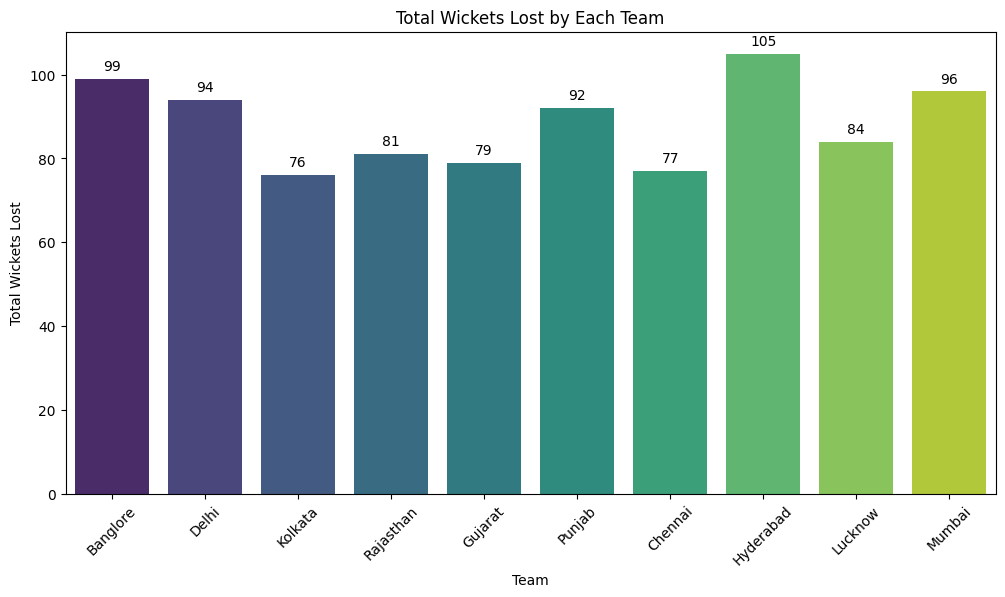

In [60]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=Total_wickets, x='Team', y='TotalWicketsLost', palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.title('Total Wickets Lost by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets Lost')
plt.xticks(rotation=45)
plt.show()

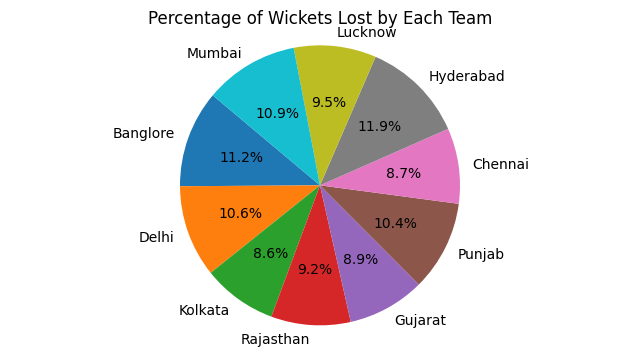

In [71]:
plt.figure(figsize=(8,4))
colors = plt.get_cmap('tab10').colors
plt.pie(Total_wickets['Wicket %'], labels=Total_wickets['Team'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Wickets Lost by Each Team')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# From the dataset the following things were noticed:
* Team Rajasthan had the hightest percentage of TOSS wins which is 14.9% 
* Majority of the times, the team that won the toss decided to field which is by 73.2%
* Throught the tournament, Kolkata won most of the matches 
* Batting First Hyrdrabad scored maximum number of runs which is 1895
* Batting First Punjab scored minimum number of runs which is 679
* Batting second Punjab scored maximum number of runs which is 1808
* Batting second Kolkata scored the minimum number of wickets which is 783
* Throughout the Tournament Hydrabad scored the maximum runs which is 2952 runs which is 11.4% runs share
* Throughout the Tournament Gujrat scored the minimum runs which is 2040 runs which is 7.9% runs share
* Batting First Hyrdrabad lost the maximum number of wickets which is 70 
* Batting First Rajasthan lost the minimum number of wickets which is 26
* Batting second Punjab lost the maximum number of wickets which is 63 
* Batting second Kolkata lost the minimum number of wickets which is 12 
* Throughout the Tournament Hydrabad lost the maximum number of wickets which is 105 which is 11.9% wicket share
* Throughout the Tournament Kolkata lost the minimum number of wickets which is 76 which is 8.6% wicket share


